In [2]:
import pandas as pd # para trabalhar com os dados
import numpy as np # para fazer cálculos

# Importar o dataset "ansiedade" para o Python (se você usar o pd.read_csv, o resultado já será um DataFrame do Pandas)

dados = pd.read_csv("C:/Users/20221enpro0081/Downloads/enhanced_anxiety_dataset.csv", sep = ",", decimal = ".") 

# mostrar as primeiras linhas na tela

dados.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [3]:
# Verificar se existem valores faltantes. Se houver, tomar uma decisão sobre o que fazer e implementar esta decisão.

print(dados.isnull().sum())

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64


In [7]:
# Fazer a matriz de correlações
atributos_selecionados = ['Age', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)', 'Stress Level (1-10)', 'Heart Rate (bpm)', 'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Therapy Sessions (per month)', 'Diet Quality (1-10)', 'Anxiety Level (1-10)']

X = dados[atributos_selecionados]

matriz_correlacoes = X.corr()
print(matriz_correlacoes['Anxiety Level (1-10)'])

Age                                 -0.074316
Sleep Hours                         -0.493836
Physical Activity (hrs/week)        -0.243187
Caffeine Intake (mg/day)             0.350651
Alcohol Consumption (drinks/week)    0.100626
Stress Level (1-10)                  0.667939
Heart Rate (bpm)                     0.188900
Breathing Rate (breaths/min)         0.157048
Sweating Level (1-5)                 0.160074
Therapy Sessions (per month)         0.517606
Diet Quality (1-10)                 -0.220245
Anxiety Level (1-10)                 1.000000
Name: Anxiety Level (1-10), dtype: float64


Text(0.5, 1.0, 'Matriz de correlações')

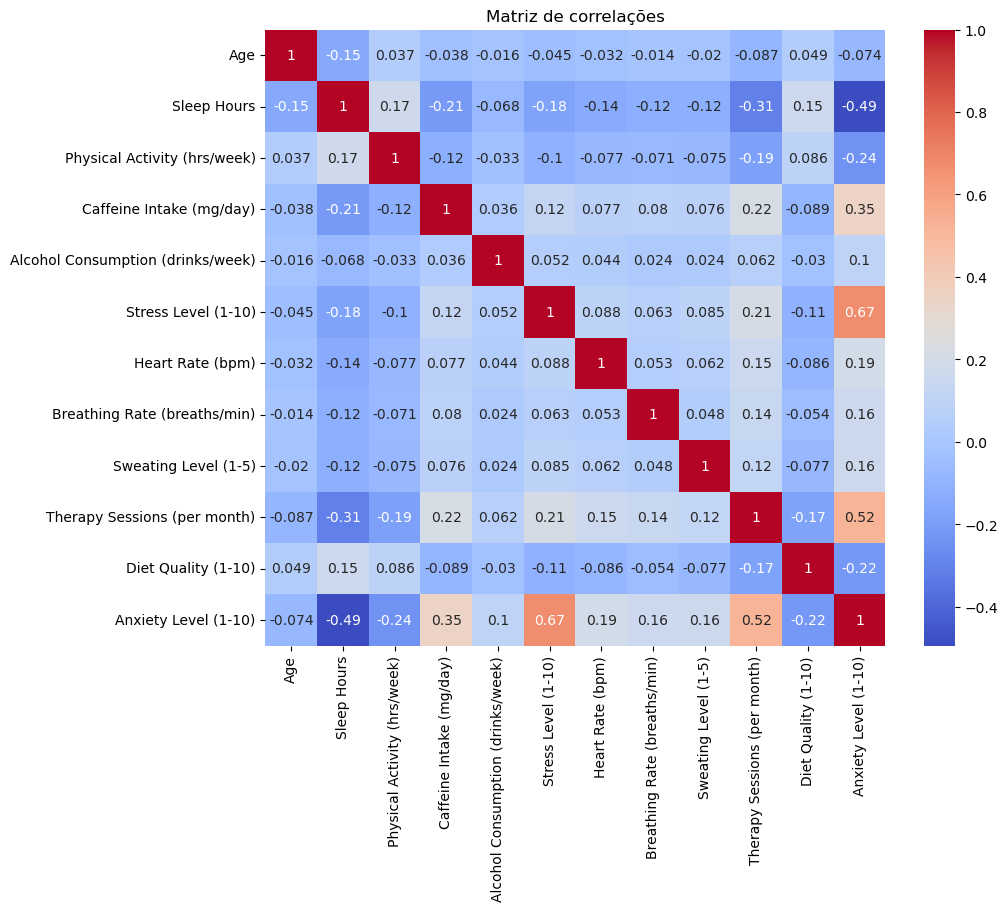

In [8]:
# Mostrar a matriz de correlações em um mapa de calor

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
sns.heatmap(X.corr(), annot = True, cmap = 'coolwarm')
plt.title('Matriz de correlações')

In [9]:
# Escolher as 5 variáveis numéricas mais correlacionadas com a variável dependente e criar novos DataFrames X e y 

atributos_selecionados_2 = ['Stress Level (1-10)', 'Therapy Sessions (per month)', 'Sleep Hours', 'Caffeine Intake (mg/day)', 'Physical Activity (hrs/week)']

X = dados[atributos_selecionados_2]
Y = dados['Anxiety Level (1-10)']

print(X)

       Stress Level (1-10)  Therapy Sessions (per month)  Sleep Hours  \
0                       10                             3          6.0   
1                        1                             2          6.2   
2                        1                             1          5.0   
3                        4                             0          5.8   
4                        1                             1          8.2   
...                    ...                           ...          ...   
10995                    8                             1          6.1   
10996                    7                             2          6.6   
10997                    8                             2          6.7   
10998                    4                             1          5.7   
10999                    1                             2          6.1   

       Caffeine Intake (mg/day)  Physical Activity (hrs/week)  
0                           181                           2

In [10]:
# Padronizar as variáveis X

from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()

X_padronizado = padronizador.fit_transform(X)

print(X_padronizado)

[[ 1.41562653  0.26210725 -0.53011464 -0.72572672 -0.1324784 ]
 [-1.65912175 -0.1959766  -0.36717564 -0.59451721  1.50889088]
 [-1.65912175 -0.65406046 -1.34480966 -1.1676956   0.4146447 ]
 ...
 [ 0.73234914 -0.1959766   0.04017187 -0.87765352  2.16543859]
 [-0.63420565 -0.65406046 -0.77452315 -0.26304054 -0.1324784 ]
 [-1.65912175 -0.1959766  -0.44864514 -0.55998839 -1.00787534]]


In [11]:
# Implementar a regressão múltipla usando o pacote sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Separação dos dados em treino e teste

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_padronizado, Y, test_size = 0.2, random_state = 42)

# Inicialização e ajuste do modelo

modelo = LinearRegression()
modelo.fit(X_treino, Y_treino)

# Predições na amostra teste

y_pred = modelo.predict(X_teste)

print("Erro médio percentual absoluto (MAPE):{:.4f}".format(mean_absolute_percentage_error(Y_teste, y_pred)))
print("R²:{:.4f}".format(r2_score(Y_teste, y_pred)))


Erro médio percentual absoluto (MAPE):0.3234
R²:0.7144


In [ ]:
# Erro médio percentual absoluto (MAPE):0.3234 > os dados previstos estão com um erro baixo com relação aos dados reais
# R²:0.7144 > a reta do modelo se ajusta bem aos dados reais 